In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())
df["BMI"]=df["BMI"].replace(0,df["BMI"].mean())

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

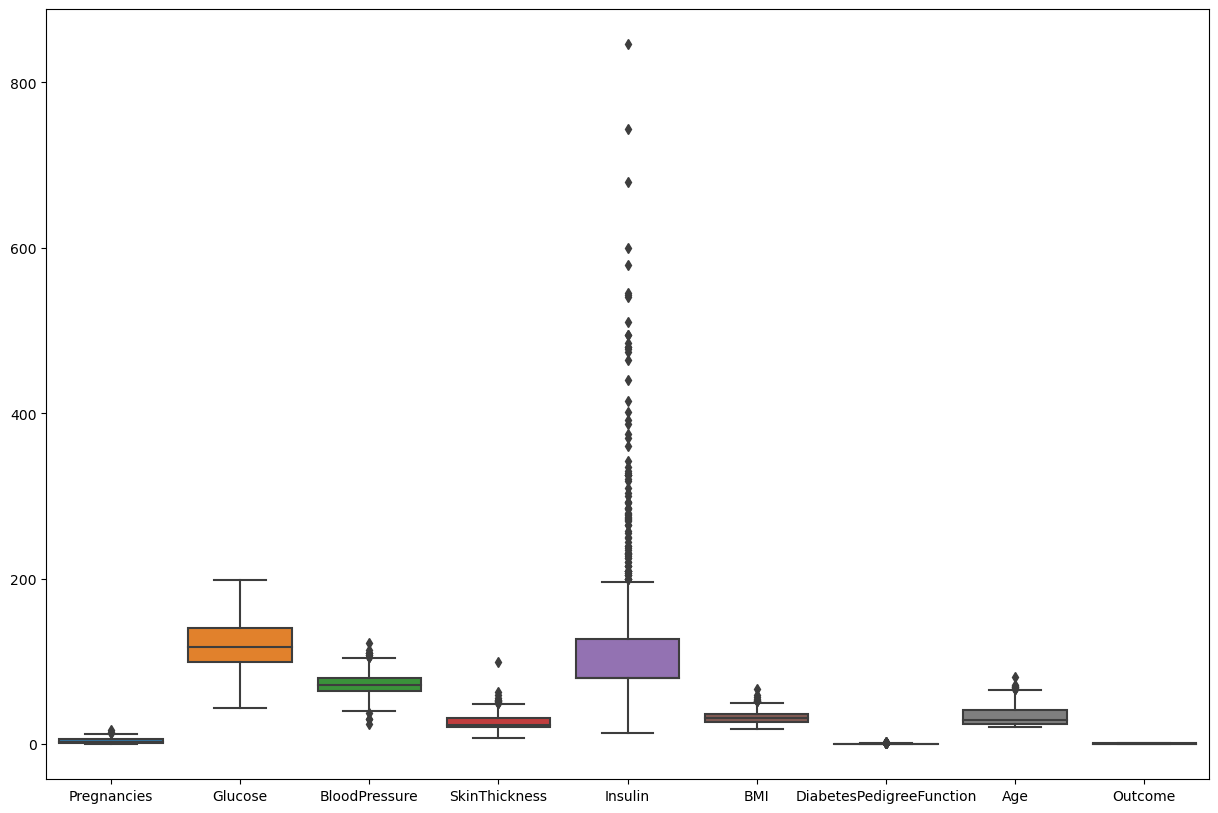

In [8]:
plt.subplots(figsize=(15,10))
sns.boxplot(data=df )

In [9]:
# separating independent and dependent features
X=df.drop(columns=["Outcome"])  
y=df["Outcome"] 

In [10]:
# spliting data into train and test 
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
# feature scaling 
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
# logistic regression model
from sklearn.linear_model import LogisticRegression

In [16]:
log_reg=LogisticRegression()

In [17]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [18]:
parameters={"penalty":["l1", "l2"], "C":np.logspace(-3,3,7), "solver":["lbfgs", "liblinear", "newton-cg"]}

In [19]:
clf=GridSearchCV(estimator=log_reg, param_grid=parameters, scoring="accuracy", cv=10)

In [20]:
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [21]:
clf.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [22]:
clf.best_score_

0.7820135746606335

In [23]:
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [24]:
y_pred=clf.predict(X_test_scaled)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, r2_score

In [26]:
confusion_matrix(y_test, y_pred)

array([[142,  26],
       [ 37,  49]])

In [27]:
accuracy_score(y_test, y_pred)

0.7519685039370079

In [28]:
precision_score(y_test, y_pred)

0.6533333333333333

In [29]:
recall_score(y_test, y_pred)

0.5697674418604651

In [30]:
f1_score(y_test, y_pred)

0.608695652173913